<a href="https://colab.research.google.com/github/sallumandya1995/baith-al-suroor/blob/main/baith_ul_sorror_img2img_img_2_video_version_4pm_25_dec%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

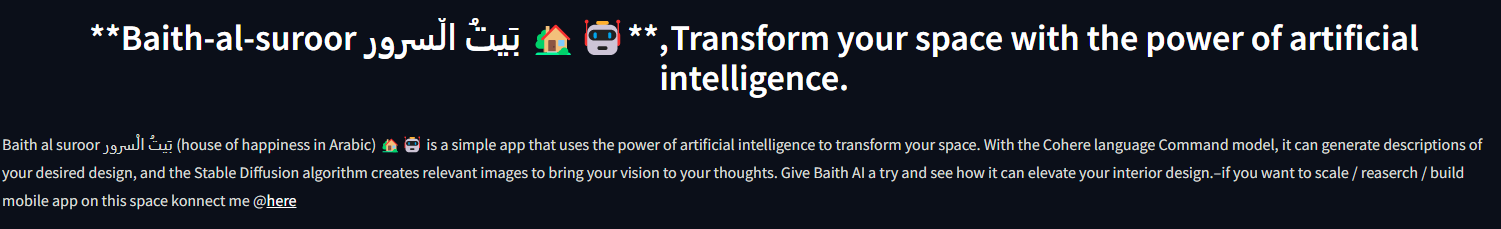

In [ ]:
!nvidia-smi
 

Sun Dec  4 09:57:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Load the pipeline

 **Cohere one shot lerning capbility**
 
 
Using power of Cohere's command model to write a detailed caption of an image describing the interior design of living room and letting stable diffusion do the remaining magic
 

In [ ]:
#@title init libraries for GPu
!pip install -qq cohere
!pip install -qq gradio
!pip install -qq accelerate
!pip install -qq diffusers==0.8.0   ftfy
!pip install -qq "ipywidgets>=7,<8"
 
!pip install git+https://github.com/huggingface/transformers
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline
  
import random
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline

import requests
import os
 
from IPython.display import Image, display
import cohere

from huggingface_hub import notebook_login
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline
import inspect
import warnings
from typing import List, Optional, Union
 
 
device = "cuda"
model_path = "prompthero/midjourney-v4-diffusion"
model_path="stabilityai/stable-diffusion-2"

model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
#     revision="fp16",  # comment for prompt hero version
    torch_dtype=torch.float16
    ,use_auth_token=True
)
pipe = pipe.to(device)


#upscalers

!git clone https://huggingface.co/spaces/Xhaheen/Face-Real-ESRGAN
!pip install -q gdown gradio
!cp -r Face-Real-ESRGAN/. .

# %cd Face-Real-ESRGAN

     |████████████████████████████████| 11.6 MB 29.2 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 106 kB 64.4 MB/s 
     |████████████████████████████████| 278 kB 74.4 MB/s 
     |████████████████████████████████| 55 kB 4.5 MB/s 
     |████████████████████████████████| 2.3 MB 52.8 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 84 kB 5.0 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 213 kB 85.4 MB/s 
     |████████████████████████████████| 64 kB 612 kB/s 
     |████████████████████████████████| 80 kB 10.9 MB/s 
     |████████████████████████████████| 68 kB 8.6 MB/s 
     |████████████████████████████████| 68 kB 9.3 MB/s 
     |████████████████████████████████| 68 kB 9.1 MB/s 
     |████████████████████████████████| 68 kB 8.4 MB/s 
     |████████████████████████████████| 46 kB 5.1 MB/s 
     |██████████████████████████████

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cloning into 'Face-Real-ESRGAN'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 11
Unpacking objects: 100% (14/14), done.


In [ ]:
#@title using cohere  and gpus
import csv
from PIL import Image


import re
import datetime


 
import random
import torch
from PIL import Image
import numpy as np
from realesrgan import RealESRGAN
import os
import gradio as gr
import os

import matplotlib.pyplot as plt
 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


        
current_time = datetime.datetime.now()
def generate_caption_keywords(prompt, model='command-xlarge-20221108', max_tokens=200, temperature=random.uniform(0.1, 2), k=0, p=0.75, frequency_penalty=0, presence_penalty=0, stop_sequences=[]):
    
    response = co.generate(
      model=model,
      prompt=prompt,
      max_tokens=max_tokens,
      temperature=temperature,
      k=k,
      p=p,
      frequency_penalty=frequency_penalty,
      presence_penalty=presence_penalty,
      stop_sequences=stop_sequences,
      return_likelihoods='NONE')

    def highlight_keywords(text):
        keywords = []
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text) # remove punctuation
        text = re.sub(r'\b(the|and|of)\b', '', text) # remove stop words
        words = text.split()
        for word in words:
            if word not in keywords:
                keywords.append(word)
        return keywords

    caption = response.generations[0].text
    keywords = highlight_keywords(caption)
    keywords_string = ', '.join(keywords)

    return caption, keywords_string


def img2img( path ,is_HD,design,x_prompt,alt_prompt,strength,guidance_scale,steps):
  current_time = datetime.datetime.now()
  prompt = f'write a detailed caption of an image describing the  {design}'
  
  try:
        caption, keywords = generate_caption_keywords(prompt)
        prompt = keywords
  except:
    
    prompt = design
    

  if x_prompt == True:
    
    prompt=alt_prompt
    print(alt_prompt ,strength,7.9,current_time)
     
 
  generator = torch.Generator(device=device).manual_seed(1024) 
  
 
    
  init_img =Image.open(path)
#   init_img.save(f"original_{prompts[0]}_strength{strength}_guidance_{guidance_scale}.jpeg")

  with autocast("cuda"):
        
      
      image2 = pipe(prompt=prompt , init_image=init_img, strength=strength,num_inference_steps=steps, guidance_scale=guidance_scale, generator=generator).images[0]
      
 #remove if condition in above line if it does not fits
      if is_HD == True:


        model8 = RealESRGAN(device, scale=8)

         
        model8.load_weights('RealESRGAN_x8.pth')
        image2 = model8.predict(image2.convert('RGB'))
        
 
      image2.save("image2.jpeg")
      image2.save(f"new_{current_time}{design}_strength{strength}_guidance_{guidance_scale}.jpeg")
#       print(design,prompt ,strength,7.9,current_time)
      # Import the pyplot module from Matplotlib

 

      # Display the image using the imshow function
      plt.imshow(image2)

      # Show the plot on the screen
      plt.show()

      print(f"new_{current_time}{design}_strength{strength}_guidance_{guidance_scale}.jpeg")
      current_image=f"new_{current_time}{design}_strength{strength}_guidance_{guidance_scale}.jpeg"
      


      # Download the file # comment for kaggle
      from google.colab import files
      files.download(f"new_{current_time}{design}_strength{strength}_guidance_{guidance_scale}.jpeg")
 
      
  def append_csv(filename, row):
      with open(filename, "a") as f:
          writer = csv.writer(f)
          writer.writerow(row)
# records the data bases to store inputs and outputs for future reference
  append_csv("database.csv", [current_time,strength,guidance_scale,f"new_{prompt}_strength{strength}_guidance_{guidance_scale}.jpeg"])

  
  return image2

 

--2022-12-04 10:08:09--  https://huggingface.co/spaces/Xhaheen/Baith-al-suroor/resolve/main/1.png
Resolving huggingface.co (huggingface.co)... 3.234.187.147, 54.147.99.175, 2600:1f18:147f:e850:d78f:7d9d:6ec3:2aee, ...
Connecting to huggingface.co (huggingface.co)|3.234.187.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 686113 (670K) [image/png]
Saving to: ‘1.png.1’

1.png.1             100%[===================>] 670.03K   599KB/s    in 1.1s    

2022-12-04 10:08:11 (599 KB/s) - ‘1.png.1’ saved [686113/686113]

--2022-12-04 10:08:11--  https://huggingface.co/spaces/Xhaheen/Face-Real-ESRGAN/resolve/main/RealESRGAN_x8.pth
Resolving huggingface.co (huggingface.co)... 54.147.99.175, 3.234.187.147, 2600:1f18:147f:e850:d78f:7d9d:6ec3:2aee, ...
Connecting to huggingface.co (huggingface.co)|54.147.99.175|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/33/ba/33ba29086036588838bd334ff6f0ec159be99c86

room with computer interfaces on the floor, ceiling and walls, dimly illuminated by led lights, octane render, ray - tracing, 4 k, 3 3 mm  0.6 7.9 2022-12-04 10:08:43.365078


  0%|          | 0/31 [00:00<?, ?it/s]

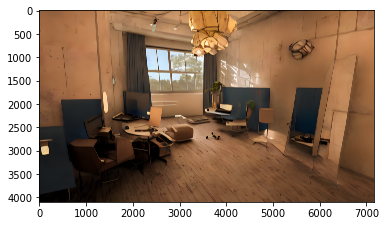

new_2022-12-04 10:08:43.365078home_strength0.6_guidance_7.jpeg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
img2img('/content/1.png',True,'home',True,'room with computer interfaces on the floor, ceiling and walls, dimly illuminated by led lights, octane render, ray - tracing, 4 k, 3 3 mm ',0.56,7,50)

#input custom prompt  you can refer https://lexica.art/?q=interior+design  as per your need
#setting second arguement to true to make output HD , You can set it to False if you get error

In [ ]:
#try prompts from https://lexica.art/?q=interior+design
#start to try strength variable from 0.5 to 0.7
#once you like the output check the HD Button and retry with strength 0 and your input image
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://a5acb6ec847fd844.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', windows, letting, in, lot, natural']


  0%|          | 0/33 [00:00<?, ?it/s]

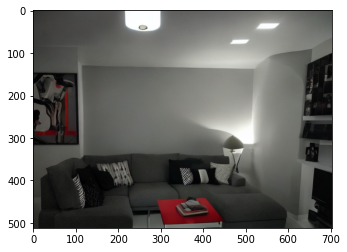

new_2022-12-04 10:12:21.408155interior design of living room_strength0.65_guidance_7.jpeg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


In [ ]:
#@title GRadio for gpu powered app
import gradio as gr
gr.Interface(
             img2img,
              [gr.Image(source="upload", type="filepath", label="Input Image"),
                        gr.Checkbox(label="Click HD to get HD output ",value = False),
                        gr.Dropdown(['interior design of living room', 
                                         'interior design of gaming room',
                                         'interior design of kitchen',
                                         'interior design of bedroom',
                                         'interior design of bathroom',
                                         'interior design of office',
                                         'interior design of meeting room',
                                         'interior design of personal room'],label="Click here to select your design using Cohere Command Model",value = 'interior design'), 
                        gr.Checkbox(label="Custom design",value = False),

                        gr.Textbox(label = ' Input custom Prompt Text'),
                        gr.Slider(label='Strength', minimum = 0, maximum = 1, step = .01, value = .65),
                        gr.Slider(2, 15, value = 7, label = 'Guidence Scale'),
                        gr.Slider(10, 50, value = 50, step = 1, label = 'Number of Iterations')
                        ], 
                        gr.Image(), title = "" +'Baith   بَیتُ الْسرور  🏡💡🤖, Transform your space with the power of artificial intelligence. '+ "",
                                    description="Baith al suroor بَیتُ الْسرور  (house of happiness in Arabic)  🏡💡🤖   is an App that uses the power of artificial intelligence to transform your space. With the Cohere language Command model, it can generate descriptions of your desired design, and the Stable Diffusion algorithm creates relevant images to bring your vision to life. Give Baith AI a try and see how it can elevate your interior design.--if you want to scale or reaserch this space konnect me   @[here](https://www.linkedin.com/in/sallu-mandya/)").launch(share = True, debug = True)

In [ ]:
#below approach using gpus from https://beta.dreamstudio.ai/dream  for faster inference

In [ ]:
#@title using stability ai sdk and spaces at https://huggingface.co/spaces/Xhaheen/Baith_Home

#Documentation https://platform.stability.ai/docs/features/image-to-image




 
%pip install -q stability-sdk
!pip install -q gradio
!wget https://huggingface.co/spaces/Xhaheen/Baith-al-suroor/resolve/main/1.png
 

import io
import os
import warnings
import random
from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation
from PIL import Image
import matplotlib.pyplot as plt

# NB: host url is not prepended with \"https\" nor does it have a trailing slash.
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'

# To get your API key, visit https://beta.dreamstudio.ai/membership
# os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')
os.environ['STABILITY_KEY'] = 'sk-4RW1isPNsFGoWx7peJuJdpIXHYEiDr5SmDQeS5517X5AyrLD' #insert api key from dreamstudio  link - https://beta.dreamstudio.ai/dream
# key_srkian = os.environ["key_srkian"]
# STABILITY_KEY = os.environ["STABILITY_KEY"]
# sk-eOyV6LN6Bg7DLEiJmR5BgjkJM4hSoXMnbBS2YfFV6KRVDT06
# sk-4RW1isPNsFGoWx7peJuJdpIXHYEiDr5SmDQeS5517X5AyrLD  #active 3 december

# 
# co = cohere.Client(key_srkian)#srkian


 

stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-v1-5", # Set the engine to use for generation. For SD 2.0 use "stable-diffusion-v2-0".
    # Available engines: stable-diffusion-v1 stable-diffusion-v1-5 stable-diffusion-512-v2-0 stable-diffusion-768-v2-0 stable-inpainting-v1-0 stable-inpainting-512-v2-0
)



def generate_caption_keywords(prompt, model='command-xlarge-20221108', max_tokens=200, temperature=random.uniform(0.1, 2), k=0, p=0.75, frequency_penalty=0, presence_penalty=0, stop_sequences=[]):
    
    response = co.generate(
      model=model,
      prompt=prompt,
      max_tokens=max_tokens,
      temperature=temperature,
      k=k,
      p=p, 
      stop_sequences=stop_sequences,
      return_likelihoods='NONE')

    def highlight_keywords(text):
        keywords = []
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text) # remove punctuation
        text = re.sub(r'\b(the|and|of)\b', '', text) # remove stop words
        words = text.split()
        for word in words:
            if word not in keywords:
                keywords.append(word)
        return keywords

    caption = response.generations[0].text
    keywords = highlight_keywords(caption)
    keywords_string = ', '.join(keywords)

    return caption, keywords_string


def img2img( path ,is_HD,design,x_prompt,alt_prompt,strength,guidance_scale,steps):



  img = Image.open(path)

  try:
        caption, keywords = generate_caption_keywords(design)
        prompt = keywords
  except:
    
    prompt = design
    
 

  if x_prompt == True:

    prompt=alt_prompt


    answers = stability_api.generate(
      prompt,
      init_image=img, # Assign our previously generated img as our Initial Image for transformation.
      start_schedule=strength, # Set the strength of our prompt in relation to our initial image.
      seed=123467458, # If attempting to transform an image that was previously generated with our API,
                      # initial images benefit from having their own distinct seed rather than using the seed of the original image generation.
      steps=30, # Amount of inference steps performed on image generation. Defaults to 30. 
      cfg_scale=8.0, # Influences how strongly your generation is guided to match your prompt.
                    # Setting this value higher increases the strength in which it tries to match your prompt.
                    # Defaults to 7.0 if not specified.
      width=512, # Generation width, defaults to 512 if not included.
      height=512, # Generation height, defaults to 512 if not included.
      sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                  # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                  # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m)
  )
  



  # iterating over the generator produces the api response
  for resp in answers:
      for artifact in resp.artifacts:
          if artifact.finish_reason == generation.FILTER:
              warnings.warn(
                  "Your request activated the API's safety filters and could not be processed."
                  "Please modify the prompt and try again.")
          if artifact.type == generation.ARTIFACT_IMAGE:
              img2 = Image.open(io.BytesIO(artifact.binary))
              im1 = img2.save(f"new_image_strength{strength}.jpg")
              # Show the image
              plt.imshow(img2)
              plt.show()
 
              print(prompt)
              print(strength)
  return img2
# img2img('init_img.jpeg',False,'home',True,"interior design",0.55,7,50)



     |████████████████████████████████| 47 kB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 49.7 MB/s 
     |████████████████████████████████| 4.6 MB 58.6 MB/s 
     |████████████████████████████████| 2.4 MB 46.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.48.2 requires grpcio>=1.48.2, but you have grpcio 1.48.1 which is incompatible.
--2022-12-04 10:14:06--  https://huggingface.co/spaces/Xhaheen/Baith-al-suroor/resolve/main/1.png
Resolving huggingface.co (huggingface.co)... 54.147.99.175, 3.234.187.147, 2600:1f18:147f:e850:d78f:7d9d:6ec3:2aee, ...
Connecting to huggingface.co (huggingface.co)|54.147.99.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 686113 (670K) [image/png]
Saving to: ‘1.png.2’

1.png.2             100%[===================>] 670.03K   608KB/s    in 1.1s    

2022-12-04 10:14:0

INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443


INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got keepalive 40158b3a-3fb1-4c46-839f-50b6ab48b219 in 4.82s
INFO:stability_sdk.client:Got keepalive 40158b3a-3fb1-4c46-839f-50b6ab48b219 in 3.36s
INFO:stability_sdk.client:Got 40158b3a-3fb1-4c46-839f-50b6ab48b219 with ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 1.30s


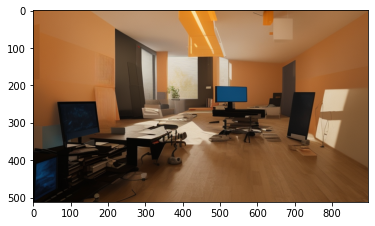

room with computer interfaces on the floor, ceiling and walls, dimly illuminated by led lights, octane render, ray - tracing, 4 k, 3 3 mm 
0.6


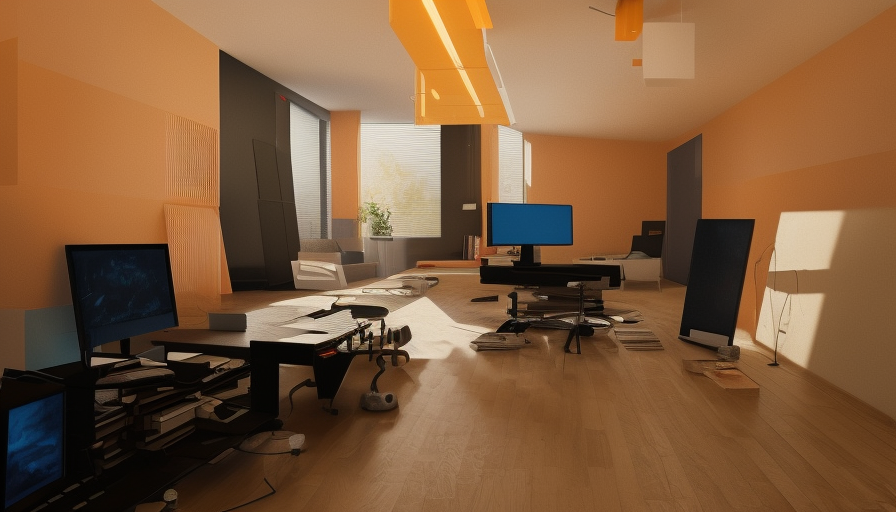

In [ ]:
 
img2img('/content/1.png',False,'home',True,'room with computer interfaces on the floor, ceiling and walls, dimly illuminated by led lights, octane render, ray - tracing, 4 k, 3 3 mm ',0.6,7,50)

In [ ]:
#restart notebook before launching below cells

In [ ]:
#below approach using gpus from https://beta.dreamstudio.ai/dream  for creaing multiple images and combining them as generative video